- <a href="#shinola">Shinola</a><br>
- <a href="#stella">Stella McCartney</a><br>
- <a href="#karl">Karl Lagerfeld</a><br>
- <a href="#christian">Christian Louboutin</a><br>
- <a href="#saints">All Saints</a><br>
- <a href="#everlane">Everlane</a><br>
- <a href="#yves">Yves Saint Laurent</a><br>
- <a href="#lim">Phillip Lim</a><br>
- <a href="#women">Coach Women's</a><br>
- <a href="#men">Coach Men's</a><br>
- <a href="#valentino">Valentino</a><br>
- <a href="#salvatore">Salvatore Ferragamo</a><br>
- <a href="#rebecca">Rebecca Minkoff</a><br>
- <a href="#alex">Alexander McQueen</a><br>
- <a href="#function">Functions Used</a><br>

<p><a name="shinola"></a></p>

# Shinola

In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [194]:
import requests
response = requests.get('https://www.shinola.com/womens/handbags-accessories/all/bags.html#')
text = BeautifulSoup(response.text, 'html.parser')

In [4]:
print(text.prettify())

<!DOCTYPE html>
<!--[if lt IE 7 ]> <html lang="en" id="top" class="no-js ie6"> <![endif]-->
<!--[if IE 7 ]>    <html lang="en" id="top" class="no-js ie7"> <![endif]-->
<!--[if IE 8 ]>    <html lang="en" id="top" class="no-js ie8"> <![endif]-->
<!--[if IE 9 ]>    <html lang="en" id="top" class="no-js ie9"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="no-js" id="top" lang="en">
 <!--<![endif]-->
 <head>
  <script type="text/javascript">
   (window.NREUM||(NREUM={})).loader_config={xpid:"UQcAVlRRGwIHVlhTBAMB"};window.NREUM||(NREUM={}),__nr_require=function(t,n,e){function r(e){if(!n[e]){var o=n[e]={exports:{}};t[e][0].call(o.exports,function(n){var o=t[e][1][n];return r(o||n)},o,o.exports)}return n[e].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<e.length;o++)r(e[o]);return r}({1:[function(t,n,e){function r(t){try{s.console&&console.log(t)}catch(n){}}var o,i=t("ee"),a=t(18),s={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"functi

In [195]:
# Finding the span tags to use get the style
product = text.find_all('span',{'class': "sl_split"})
product = [get.string for get in product]
style = product[18::3]
material = product[19::3]
color = product[20::3]

In [196]:
# Getting the price
price = text.find_all('span', {'itemprop': "price"})
price

[<span content="795" itemprop="price">795</span>,
 <span content="795" itemprop="price">795</span>,
 <span content="295" itemprop="price">295</span>,
 <span content="295" itemprop="price">295</span>,
 <span content="295" itemprop="price">295</span>,
 <span content="295" itemprop="price">295</span>,
 <span content="295" itemprop="price">295</span>,
 <span content="295" itemprop="price">295</span>,
 <span content="395" itemprop="price">395</span>,
 <span content="395" itemprop="price">395</span>,
 <span content="395" itemprop="price">395</span>,
 <span content="395" itemprop="price">395</span>,
 <span content="795" itemprop="price">795</span>,
 <span content="795" itemprop="price">795</span>,
 <span content="795" itemprop="price">795</span>,
 <span content="395" itemprop="price">395</span>,
 <span content="395" itemprop="price">395</span>,
 <span content="395" itemprop="price">395</span>,
 <span content="395" itemprop="price">395</span>,
 <span content="395" itemprop="price">395</span>,


In [197]:
prices = [get.string for get in price]
prices

['795',
 '795',
 '295',
 '295',
 '295',
 '295',
 '295',
 '295',
 '395',
 '395',
 '395',
 '395',
 '795',
 '795',
 '795',
 '395',
 '395',
 '395',
 '395',
 '395',
 '395',
 '395',
 '395',
 '395',
 '395',
 '495',
 '695',
 '695',
 '695',
 '695',
 '795',
 '795',
 '495',
 '495',
 '495',
 '495',
 '695',
 '695',
 '395',
 '395',
 '395',
 '795',
 '395',
 '395',
 '395']

In [198]:
prices = list(map(int, prices))
prices

[795,
 795,
 295,
 295,
 295,
 295,
 295,
 295,
 395,
 395,
 395,
 395,
 795,
 795,
 795,
 395,
 395,
 395,
 395,
 395,
 395,
 395,
 395,
 395,
 395,
 495,
 695,
 695,
 695,
 695,
 795,
 795,
 495,
 495,
 495,
 495,
 695,
 695,
 395,
 395,
 395,
 795,
 395,
 395,
 395]

In [199]:
style = pd.DataFrame(style, columns= ['style'])
material = pd.DataFrame(material, columns= ['material'])
color = pd.DataFrame(color, columns= ['color'])
price = pd.DataFrame(prices, columns= ['price'])

In [200]:
#SM = style and material
sm = pd.concat([style,material], axis = 1)

#cp = color and price
cp = pd.concat([color, price], axis = 1)

In [201]:
shinola = pd.concat([sm,cp], axis = 1)

<BarContainer object of 45 artists>

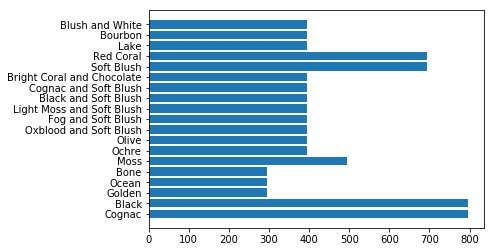

In [202]:
plt.barh(shinola.color, shinola.price)

In [204]:
shinola['brand'] = ['Shinola'] *45

In [205]:
shinola

style            material                       color  \
0         Woodward Backpack       Nappa Leather                      Cognac   
1         Woodward Backpack       Nappa Leather                       Black   
2               Market Tote          Soft Suede                      Golden   
3               Market Tote          Soft Suede                       Ocean   
4               Market Tote          Soft Suede                      Cognac   
5               Market Tote          Soft Suede                        Bone   
6               Market Tote          Soft Suede                       Black   
7               Market Tote          Soft Suede                        Moss   
8   Woodward Mini Crossbody       Nappa Leather                       Black   
9   Woodward Mini Crossbody       Nappa Leather                       Ochre   
10  Woodward Mini Crossbody       Nappa Leather                       Olive   
11  Woodward Mini Crossbody       Nappa Leather                      Cognac   
12      Medium Braided Tote   Signature Leather                       Black   
13   Small Runwell Backpack   Signature Leather                      Cognac   
14   Small Runwell Backpack   Signature Leather                       Black   
15      Accordion Crossbody    Double Face Luxe      Oxblood and Soft Blush   
16      Accordion Crossbody    Double Face Luxe          Fog and Soft Blush   
17      Accordion Crossbody    Double Face Luxe   Light Moss and Soft Blush   
18      Accordion Crossbody    Double Face Luxe        Black and Soft Blush   
19      Accordion Crossbody    Double Face Luxe       Cognac and Soft Blush   
20      Medium Shopper Tote  Luxe Grain Leather      Oxblood and Soft Blush   
21      Medium Shopper Tote  Luxe Grain Leather          Fog and Soft Blush   
22      Medium Shopper Tote  Luxe Grain Leather  Bright Coral and Chocolate   
23      Medium Shopper Tote  Luxe Grain Leather       Cognac and Soft Blush   
24      Medium Shopper Tote  Luxe Grain Leather        Black and Soft Blush   
25      Medium Shopper Tote   Signature Leather                       Black   
26           Accordion Tote       Nappa Leather                  Soft Blush   
27           Accordion Tote       Nappa Leather                   Red Coral   
28           Accordion Tote       Nappa Leather                      Cognac   
29           Accordion Tote       Nappa Leather                       Black   
30                Cass Tote   Signature Leather                       Black   
31                Cass Tote   Signature Leather                      Cognac   
32           Cass Crossbody   Signature Leather                  Soft Blush   
33           Cass Crossbody   Signature Leather                        Moss   
34           Cass Crossbody   Signature Leather                       Black   
35           Cass Crossbody   Signature Leather                      Cognac   
36                Cass Hobo   Signature Leather                      Cognac   
37                Cass Hobo   Signature Leather                       Black   
38       Crescent Crossbody       Nappa Leather                        Lake   
39       Crescent Crossbody       Nappa Leather                     Bourbon   
40       Crescent Crossbody       Nappa Leather                       Black   
41        Zip Shoulder Tote  Luxe Grain Leather                       Black   
42          Mini Drawstring  Luxe Grain Leather                  Soft Blush   
43          Mini Drawstring  Luxe Grain Leather                       Black   
44      Accordion Crossbody    Double Face Luxe             Blush and White   

    price    brand  
0     795  Shinola  
1     795  Shinola  
2     295  Shinola  
3     295  Shinola  
4     295  Shinola  
5     295  Shinola  
6     295  Shinola  
7     295  Shinola  
8     395  Shinola  
9     395  Shinola  
10    395  Shinola  
11    395  Shinola  
12    795  Shinola  
13    795  Shinola  
14    795  Shinola  
15    395  Shinola  
16    395  Shinola  
17    395

<p><a name="stella"></a></p>

# Stella McCartney

In [209]:
pd.read_csv('stella.csv')

Stella Logo Belt Bag    890
0                              Stella Logo Belt Bag    890
1                              Stella Logo Belt Bag    595
2                              Stella Logo Belt Bag    575
3                              Stella Logo Mini Bag    650
4                          Stella Logo Shoulder Bag    945
5                               Mini Round Logo Bag  1,295
6                          Stella Logo Shoulder Bag    790
7                          Stella Logo Shoulder Bag    850
8                              Stella Logo Tote Bag    895
9                              Stella Logo Tote Bag    875
10                        Stella Logo Crossbody Bag    875
11                             Stella Logo Tote Bag    795
12                             Stella Logo Tote Bag    790
13                             Stella Logo Tote Bag    790
14                            Stella Logo Big Pouch    445
15                          Mini Round Monogram Bag    595
16                          Mini Round Monogram Bag    650
17                          Mini Round Monogram Bag    650
18                          Mini Round Monogram Bag    750
19                            Monogram Shoulder Bag    995
20                         Monogram Canvas Belt Bag    795
21                                Monogram Belt Bag    875
22                   Falabella Go Monogram Backpack    945
23                              Monogram Small Tote    795
24                     ECONYL® Stella Star Mini Bag    650
25                             Stella Star Belt Bag    895
26         Stella Star Small Flap-Over Shoulder Bag  1,045
27               Stella Star Flap-Over Shoulder Bag  1,245
28                   Stella Star Small Shoulder Bag  1,045
29                           Falabella Shoulder Bag    875
..                                              ...    ...
40                               Falabella Tote Bag  1,125
41           Black Falabella Shaggy Deer Small Tote  1,025
42           Black Falabella Shaggy Deer Small Tote  1,025
43                               Falabella Mini Bag    995
44  Light Grey Falabella Shaggy Deer Fold Over Tote  1,025
45                 Falabella Chamois Fold Over Tote  1,045
46             Falabella Shaggy Deer Fold Over Tote  1,025
47       Black Falabella Shaggy Deer Fold Over Tote  1,025
48             Falabella Shaggy Deer Fold Over Tote  1,025
49                            Falabella Medium Tote    995
50                             Falabella Large Tote  1,125
51                  Stella McCartney 2001. Belt Bag    620
52                            Falabella Go Backpack    770
53                                 Logo Go Backpack    770
54                                         FFF Tote    795
55                  Stella McCartney 2001. City Bag    395
56                    Falabella FFF Reversible Tote  1,150
57                        Falabella Reversible Tote  1,235
58               Falabella Reversible Monogram Tote    995
59                        Falabella Reversible Tote    995
60                          Falabella Monogram Tote    995
61                        Reversible Falabella Tote  1,125
62                        Falabella Reversible Tote  1,235
63                        Reversible Falabella Tote    995
64                               Falabella Backpack  1,225
65                               Falabella Backpack    995
66                Black Falabella Shaggy Deer Purse    485
67                   Black Falabella Cross Body Bag    765
68         Black Falabella Shaggy Deer Shoulder Bag    845
69                              Falabella Mini Tote    865

[70 rows x 2 columns]

<p><a name="karl"></a></p>

# Karl Lagerfeld

In [131]:
kl_response = requests.get('https://www.karl.com/us/women/k-odina')
kl_text = BeautifulSoup(kl_response.text, 'html.parser')

In [132]:
print(kl_text.prettify())

<!DOCTYPE html>
<html class="no-js desktop" lang="en" xmlns:fb="//www.facebook.com/2008/fbml" xmlns:og="//opengraphprotocol.org/schema/">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, height=device-height,  initial-scale=1.0, user-scalable=no, user-scalable=0" name="viewport">
   <script>
    if (typeof yTos === 'undefined') {
        yTos = {};
    }

    yTos.navigation = {"SiteCode":"KARLLAGERFELD_US","Culture":"","Gender":"D","Action":"Index","Controller":"Search","Area":"","CurrencySign":"","GenerationDate":"20190822183854","GenerationOriginMachine":"YFP1KARLL03INET","PathAndQuery":"/Search/Index?sitecode=KARLLAGERFELD_US&amp;culture=&amp;language=en&amp;gender=D&amp;season=A,P,E&amp;dept=dnbgs&amp;deptType=6&amp;yurirulename=searchwithdepartmentseasonmain","Language":"en","LangId":"","PathAndQueryParsed":[{"ParamName":"sitecode","ParamValue":"KARLLAGERFELD_US"},{"ParamName":"culture","ParamValue":""

In [133]:
yup = kl_text.find_all('span',{'class': "title"})
# kl_name = [get.string for get in kl_name]
# kl_name

In [134]:
[get.string for get in yup]

['\r\nK/Odina Small Crossbody Bag\r\n    ',
 '\r\nK/Odina Small Crossbody Bag\r\n    ',
 '\r\nK/Odina Small Crossbody Bag\r\n    ',
 '\r\nK/Odina Belt Bag\r\n    ',
 '\r\nK/Odina Belt Bag\r\n    ',
 '\r\nK/Odina Belt Bag\r\n    ',
 '\r\nK/Odina Hobo Bag\r\n    ',
 '\r\nK/Odina Backpack\r\n    ',
 '\r\nK/Odina Backpack\r\n    ',
 '\r\nK/Odina Pouch\r\n    ',
 '\r\nK/Odina Pouch\r\n    ',
 '\r\nK/Odina Hobo Bag\r\n    ',
 '\r\nK/Odina Badge Holder\r\n    ',
 '\r\nK/Odina Badge Holder\r\n    ',
 '\r\nK/Odina Badge Holder\r\n    ',
 'Standard Shipping',
 'Free Exclusive Packaging',
 '\r\n            Secure payments\r\n        ',
 '\r\n            You can pay by\r\n        ']

In [179]:
kl_price = kl_text.find_all('span',{'class': "value"})
kl_price = kl_price[:15]
kl_price = [get.string for get in kl_price]
kl_price = list(map(int, kl_price))

In [180]:
kl_price

[385, 385, 385, 285, 285, 285, 485, 465, 465, 195, 195, 485, 115, 115, 115]

In [182]:
kl_name = ['Odina Small Crossbody Bag','Odina Small Crossbody Bag','Odina Small Crossbody Bag','Odina Belt Bag',
          'Odina Belt Bag','Odina Belt Bag','Odina Hobo Bag','Odina Backpack','Odina Backpack','Odina Pouch',
          'Odina Pouch','Odina Hobo Bag','Odina Badge Holder','Odina Badge Holder','Odina Badge Holder']

In [141]:
kl_color = kl_text.find_all('div', {'class': "description"})
kl_color = get_string(kl_color)
del kl_color[-1]

In [181]:
kl_color = ['Hazelwood','Black/Nikel','Washed Indigo','Hazelwood','Black/Nikel','Washed Indigo','Hazelwood','Black/Nikel','Washed Indigo',
 'Black/Nikel','Washed Indigo','Black/Nikel','Hazelwood','Washed Indigo','Black/Nikel']

In [183]:
karl = data_frame(kl_name,kl_price,kl_color)

In [185]:
karl['brand'] = ['Karl Lagerfeld'] * 15

In [186]:
karl

name  price          color           brand
0   Odina Small Crossbody Bag    385      Hazelwood  Karl Lagerfeld
1   Odina Small Crossbody Bag    385    Black/Nikel  Karl Lagerfeld
2   Odina Small Crossbody Bag    385  Washed Indigo  Karl Lagerfeld
3              Odina Belt Bag    285      Hazelwood  Karl Lagerfeld
4              Odina Belt Bag    285    Black/Nikel  Karl Lagerfeld
5              Odina Belt Bag    285  Washed Indigo  Karl Lagerfeld
6              Odina Hobo Bag    485      Hazelwood  Karl Lagerfeld
7              Odina Backpack    465    Black/Nikel  Karl Lagerfeld
8              Odina Backpack    465  Washed Indigo  Karl Lagerfeld
9                 Odina Pouch    195    Black/Nikel  Karl Lagerfeld
10                Odina Pouch    195  Washed Indigo  Karl Lagerfeld
11             Odina Hobo Bag    485    Black/Nikel  Karl Lagerfeld
12         Odina Badge Holder    115      Hazelwood  Karl Lagerfeld
13         Odina Badge Holder    115  Washed Indigo  Karl Lagerfeld
14         Odina Badge Holder    115    Black/Nikel  Karl Lagerfeld

<BarContainer object of 15 artists>

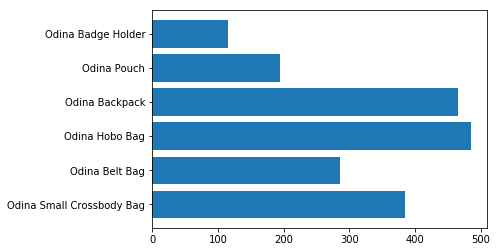

In [208]:
plt.barh(karl.name,karl.price)

<p><a name="christian"></a></p>

# Christian Louboutin
## ** Using Selenium **

In [3]:
c1 = requests.get('http://us.christianlouboutin.com/us_en/shop-online-3/women-1/bags.html?p=1')
c1_text = BeautifulSoup(c1.text, 'html.parser')
print(c1_text.prettify())

<!DOCTYPE doctype html>
<!--[if lt IE 7]>      <html lang="en" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en" class="no-js lt-ie9 lt-ie8 lt-ie10"> <![endif]-->
<!--[if IE 8]>         <html lang="en" class="no-js lt-ie9 lt-ie10"> <![endif]-->
<!--[if IE 9]>         <html lang="en" class="no-js lt-ie10"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en">
 <!--<![endif]-->
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <title>
   Women's Designer Leather Goods - Christian Louboutin Online Boutique
  </title>
  <script>
   document.cookie='resolution='+Math.max(screen.width,screen.height)+'; path=/';
  </script>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="Christian Louboutin Women Leather Goods : Discover the latest Women Leather Goods collection available at Christian Louboutin Online Boutique. " name="description"/>
  <meta content="CHRISTIAN LOUBOUTIN, SHOES,

In [8]:
c1 = c1_text.find_all('div', {'class': "product-infos"})
[get.extract() for get in c1]

[<div class="product-infos ">
 <p class="title title-cap"><a data-category="Handbags" data-price="1890.0000" data-sku="3195258Q284" href="http://us.christianlouboutin.com/us_en/shop/handbags/marie-jane-bucket-bag-27.html">Marie Jane Bucket Bag</a></p>
 <p class="subtitle">Black Suede</p>
 </div>, <div class="product-infos ">
 <p class="title title-cap"><a data-category="Handbags" data-price="1850.0000" data-sku="3195295BK1D" href="http://us.christianlouboutin.com/us_en/shop/handbags/palmette-clutch-small-1.html">Palmette Clutch</a></p>
 <p class="subtitle">Black Suede</p>
 </div>, <div class="product-infos ">
 <p class="title title-cap"><a data-category="Handbags" data-price="1990.0000" data-sku="3195280Q292" href="http://us.christianlouboutin.com/us_en/shop/handbags/paloma-s-mini-710320.html">Paloma S Mini</a></p>
 <p class="subtitle">Prunus Veau Velours</p>
 </div>, <div class="product-infos ">
 <p class="title title-cap"><a data-category="Handbags" data-price="1250.0000" data-sku="3

<p><a name="saints"></a></p>

# All Saints

In [92]:
as_response = requests.get('https://www.us.allsaints.com/women/handbags/style,any/colour,any/size,any/')
as_text = BeautifulSoup(as_response.text, 'html.parser')
print(as_text.prettify())

<!DOCTYPE html>
<!--[if lt IE 7 ]> <html lang="en" class="ie6 lt-ie7 lt-ie8 lt-ie9 lt-ie10"> <![endif]-->
<!--[if IE 7 ]>    <html lang="en" class="ie7 lt-ie8 lt-ie9 lt-ie10"> <![endif]-->
<!--[if IE 8 ]>    <html lang="en" class="ie8 lt-ie9 lt-ie10"> <![endif]-->
<!--[if IE 9 ]>    <html lang="en" class="ie9 lt-ie10"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="" lang="en">
 <!--<![endif]-->
 <head>
  <link href="/favicon.png?ver=2.1" rel="icon" type="image/x-icon"/>
  <!--[if lte IE 10 ]> <link rel="shortcut icon" href="/favicon.png?ver=2.1" type="image/x-icon" /> <![endif]-->
  <script type="text/javascript">
   window.global_translations = {
				olapic_tap_to_shop: "Tap images to shop",
				view_shopping_bag_with_items : "View Shopping Bag",
				promotion_discount: "Promotion/Discount",
				sing_up_popup_join_us: "15% off your first order",
				sing_up_popup_email_input : "Email input",
				sing_up_popup_type_email_placeholder: "Enter Your Email",
				sing_up_popup_men

In [124]:
saints = pd.read_csv('saints.csv', skiprows = 1)
saints

In [118]:
color = pd.read_csv('color.csv')
color

In [127]:
all_saints = pd.concat([saints,color], axis = 1)

<BarContainer object of 62 artists>

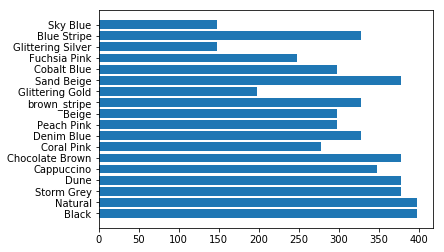

In [129]:
plt.barh(all_saints.color, all_saints.price)

In [188]:
all_saints['brand'] = ['All Saints'] *62

In [189]:
all_saints

name  price              color  \
0                        Captain Leather Backpack    378              Black   
1                           Sliver Suede Backpack    398            Natural   
2                    Captain Lea Leather Backpack    378         Storm Grey   
3                    Captain Lea Leather Backpack    378               Dune   
4                            Ziggy Suede Backpack    348         Cappuccino   
5                           Kita Leather Backpack    398              Black   
6              Harri Leather Square Crossbody Bag    348              Black   
7              Harri Leather Square Crossbody Bag    348               Dune   
8        Harri Leather Small North South Tote Bag    328    Chocolate Brown   
9        Harri Leather Small North South Tote Bag    328              Black   
10                        Nilo Kita Crossbody Bag    148              Black   
11                       Nilo Kita Small Backpack    248              Black   
12                      Nilo North South Tote Bag    298              Black   
13               Ziggy Suede North South Tote Bag    348         Cappuccino   
14                  Ziggy Suede Zip Crossbody Bag    198         Cappuccino   
15              Captain Leather Zip Crossbody Bag    228              Black   
16          Sliver Suede Fanny Pack Crossbody Bag    298            Natural   
17       Captain Leather Fanny Pack Crossbody Bag    278              Black   
18               Sliver Suede Round Crossbody Bag    348            Natural   
19       Captain Leather Mini Round Crossbody Bag    228              Black   
20          Sliver Suede Mini Round Crossbody Bag    228            Natural   
21             Captain Leather Round Shoulder Bag    378    Chocolate Brown   
22             Captain Leather Round Shoulder Bag    378              Black   
23  Captain Lea Leather Small Round Crossbody Bag    278         Coral Pink   
24        Captain Leather Lea Round Crossbody Bag    298         Denim Blue   
25            Captain Leather Round Crossbody Bag    328    Chocolate Brown   
26        Captain Leather Lea Round Crossbody Bag    298         Peach Pink   
27           Captain Leather North South Tote Bag    378               Dune   
28                  Captain Leather Flat Hobo Bag    298              Black   
29                  Captain Leather Flat Hobo Bag    298              Beige   
..                                            ...    ...                ...   
32        Captain Leather Mini Flap Crossbody Bag    218              Black   
33     Captain Lea Leather East West Tote Bag Bag    328         Denim Blue   
34                    Kita Leather Small Backpack    378              Black   
35                     Kita Leather Crossbody Bag    305              Black   
36                     Kita Leather Crossbody Bag    305         Sand Beige   
37               Captain Leather Small Bucket Bag    248        Cobalt Blue   
38       Captain Lea Leather Square Crossbody Bag    198              Black   
39       Captain Lea Leather Square Crossbody Bag    198         Coral Pink   
40       Fetch Leather Chain Wallet Crossbody Bag    148         Coral Pink   
41       Fetch Leather Chain Wallet Crossbody Bag    148         Sand Beige   
42              Captain Leather Flap Shoulder Bag    248       Fuchsia Pink   
43       Glitz Chain Wallet Leather Crossbody Bag    148  Glittering Silver   
44           Captain Leather North South Tote Bag    378              Black   
45           Captain Leather North South Tote Bag    378         Sand Beige   
46            Captain Leather Round Crossbody Bag    328              Black   
47        Captain Leather Lea Round Crossbody Bag    298         Storm Grey   
48             Captain Leather Flap Crossbody Bag    298        Cobalt Blue   
49             Captain Leather Flap Crossbody Bag    305              Black   
50             Captain Leather Flap Crossbody Bag    328        Blue Stripe   
51        Captai

<p><a name="everlane"></a></p>

# Everlane

In [7]:
e_response = requests.get('https://www.everlane.com/collections/womens-leather-bags')
e_text = BeautifulSoup(e_response.text, 'html.parser')
print(e_text.prettify())

<!DOCTYPE html>
<!--

  eEEEEEEEEEEEe    EEEE.       EEEE/    eEEEEEEEEEEEe      eEEEEEEEEEEEe.
  EEEEEEEEEEEE/    'EEEE.     EEEE/     EEEEEEEEEEEE/      eEEEEEEEEEEEEe.
  EEEE              'EEEe.   eEEE/      EEEE               eEEE      'eEEe
  EEEEEEEEEE         'EEEe. /EEE/       EEEEEEEEEE         eEEEEEEEEEEEEe'
  EEEEEEEEE/          'EEEe/EEE/        EEEEEEEEE/         eEEEEEEEEEEEe
  EEEE                 'EEEEEE/         EEEE               eEEE    'eee.
  EEEEEEEEEEEEe         'EEEE/          EEEEEEEEEEEEe      eEEE     eeee.
  eEEEEEEEEEEE/          'EE/           eEEEEEEEEEEE/      eEEE      eeee.

  eEEE                   eEe.           eEEEEe.   EEEE     eEEEEEEEEEEEE
  eEEE                  eEEEe.          eEEEeee.  EEEE     EEEEEEEEEEEE/
  eEEE                 eEEeEEe.         eEEEeeee. EEEE     EEEE
  eEEE                eEE/'eEEe.        eEEE'eeee EEEE     EEEEEEEEEE
  eEEE               eEEE..eEEEe.       eEEE 'eeeeEEEE     EEEEEEEEE/
  eEEE              eEEEEEEEEEEEe

In [6]:
e_text.find_all('span', {'class':"product__price"})

[]

<p><a name="yves"></a></p>

# Yves Saint Laurent
## ** Using Selenium **

<p><a name="lim"></a></p>

# Phillip Lim

In [83]:
pl_response = requests.get('https://www.31philliplim.com/shopping/woman/bags', verify = False)
pl_text = BeautifulSoup(pl_response.text, 'html.parser')
print(pl_text.prettify())

/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <script type="text/javascript">
   window.NREUM||(NREUM={});NREUM.info = {"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"7250f8a068","applicationID":"15213967","transactionName":"bgZXNUMEVxUAUxYKC1dMeDdySnUPEkQLDQN6DFsVQwpVCgRCTSoKXQZN","queueTime":0,"applicationTime":4136,"agent":"","atts":""}
  </script>
  <script type="text/javascript">
   (window.NREUM||(NREUM={})).loader_config={xpid:"VQUCV1ZUGwIFVlBRDgcA"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({1:[function(t,e,n){function r(t){try{s.console&&console.log(t)}catch(e){}}var o,i=t("ee"),a=t(23),s={};try{o=localStorage.getIte

In [85]:
pl_text.find_all('a', {'class':"_1CH_J _1moWC _2o7sS"})

[<a class="_1CH_J _1moWC _2o7sS" href="/shopping/claire-convertible-printed-zebra-crossbody-14040115" tabindex="0">Claire Convertible Printed Zebra Crossbody</a>,
 <a class="_1CH_J _1moWC _2o7sS" href="/shopping/pashl-mini-satchel-shearling-14040114" tabindex="0">Pashl Mini Satchel Shearling</a>,
 <a class="_1CH_J _1moWC _2o7sS" href="/shopping/luna-shearling-mini-slouchy-hobo-bag-14040113" tabindex="0">Luna Shearling Mini Slouchy Hobo Bag</a>,
 <a class="_1CH_J _1moWC _2o7sS" href="/shopping/slim-shearling-bumbag-14040112" tabindex="0">Slim Shearling Bumbag</a>,
 <a class="_1CH_J _1moWC _2o7sS" href="/shopping/charlotte-soft-messenger-bag-14040103" tabindex="0">Charlotte Soft Messenger Bag</a>,
 <a class="_1CH_J _1moWC _2o7sS" href="/shopping/charlotte-soft-crossbody-bag-14040102" tabindex="0">Charlotte Soft Crossbody Bag</a>,
 <a class="_1CH_J _1moWC _2o7sS" href="/shopping/pashli-mini-satchel-14040095" tabindex="0">Pashli Mini Satchel</a>,
 <a class="_1CH_J _1moWC _2o7sS" href="/sho

<p><a name="women"></a></p>

# Coach Women's
## ** Using Selenium **

In [1]:
huh = ['$650', '$695', '$550', '$550', '$695', '$650', '$450', '$450', '$350', '$350', '$595', '$550', '$550', '$450', '$450', '$450', '$450', '$350', '$395', '$350', '$295', '$325', '$275', '$275', '$425', '$425', '$550', '$495', '$450', '$450', '$450', '$495', '$350', '$395', '$495', '$350', '$350', '$450', '$395', '$450', '$350', '$350', '$295', '$295', '$295', '$250', '$650', '$550', '$550', '$495', '$495', '$495', '$350', '$275', '$275', '$350', '$450', '$350', '$395', '$395', '$395', '$550', '$495', '$495', '$495', '$495', '$695', '$595', '$595', '$550', '$650', '$550', '$450', '$395', '$550', '$395', '$595', '$350', '$350', '$395', '$350', '$350', '$695', '$695', '$995', '$995', '$450', '$495', '$395', '$395', '$450', '$395', '$395', '$395', '$395', '$595', '$250', '$225', '$195', '$195', '$195', '$225', '$225', '$195', '$175', '$295', '$175', '$225', '$250', '$250', '$250', '$295', '$295', '$295', '$295', '$250', '$275', '$325', '$225', '$225', '$225', '$295', '$295', '$695', '$695', '$650', '$395', '$350', '$295', '$450', '$395', '$395', '$650', '$450', '$295', '$295', '$295', '$395', '$450', '$450', '$450', '$450', '$395', '$595', '$275', '$275', '$295', '$450', '$650', '$650', '$550', '$750', '$275', '$275', '$250', '$250', '$295', '$250', '$595', '$695', '$895', '$750', '$650', '$550', '$350', '$395', '$375', '$295', '$295', '$295', '$195', '$225', '$175', '$175', '$175', '$175', '$175', '$295', '$275', '$225', '$195', '$225', '$195', '$195', '$175', '$175', '$195', '$165', '$495', '$395', '$395', '$375', '$325', '$325', '$250', '$250', '$225', '$250', '$250', '$150', '$175', '$175', '$325', '$295', '$350', '$295', '$295', '$395', '$395', '$495', '$495', '$450', '$450', '$450', '$650', '$295', '$595', '$550', '$595', '$295', '$325', '$295', '$395', '$395', '$395', '$395', '$395', '$450', '$295', '$495', '$495', '$495', '$495', '$495', '$395', '$395', '$550', '$550', '$695', '$695', '$595', '$595', '$350', '$350', '$350', '$350', '$350', '$495', '$495', '$650', '$450', '$450', '$450', '$695', '$695', '$495', '$450', '$450', '$375', '$35', '$50', '$95', '$150', '$150', '$350', '$150', '$295', '$175', '$175', '$225', '$250', '$250', '$325', '$325', '$175', '$175', '$195', '$195', '$175', '$225', '$275', '$195', '$195', '$225']

In [2]:
len(huh)

284

In [3]:
why = ['Tabby Top Handle In Signature Canvas With Kaffe...', 'Tabby Top Handle In Colorblock Snakeskin', 'Tabby Top Handle In Colorblock', 'Tabby Top Handle', 'Troupe Tote In Signature Canvas', 'Tabby Shoulder Bag 26 In Snakeskin', 'Tabby Shoulder Bag 26 In Colorblock With...', 'Tabby Shoulder Bag 26 In Colorblock With...', 'Tabby Shoulder Bag 26', 'Tabby Shoulder Bag 26', 'Tabby Shoulder Bag In Snakeskin', 'Tabby Shoulder Bag In Colorblock With Snakeskin...', 'Tabby Shoulder Bag In Colorblock With Snakeskin...', 'Tabby Shoulder Bag In Colorblock', 'Tabby Shoulder Bag', 'Tabby Shoulder Bag', 'Charlie Carryall', 'Charlie Carryall In Signature Leather', 'Charlie Carryall In Signature Canvas By...',
       'Charlie Carryall In Signature Canvas', 'Charlie Carryall 28 With Meadow Prairie Print', 'Charlie Carryall 28 With Scattered Rivets', 'Charlie Carryall 28', 'Charlie Carryall 28 In Signature Canvas', 'Charlie Carryall 40', 'Charlie Carryall 40 In Signature Canvas', 'Parker Top Handle 32', 'Parker Top Handle 32 In Colorblock With...', 'Parker Top Handle 32', 'Parker Top Handle With Scattered Rivets', 'Parker Top Handle With Quilting', 'Parker Top Handle With Quilting And Rivets', 'Parker Top Handle', 'Parker Top Handle In Signature Canvas With Rivets', 'Parker With Quilting And Rivets', 'Parker', 'Parker In Signature Leather With Rivets', 'Parker In Signature Leather With Rivets', 'Parker In Signature Canvas With Wave Patchwork', 'Parker With Rivets And Snakeskin Detail', 'Parker In Colorblock Signature Canvas', 'Parker 18 With Wave Patchwork And Snakeskin Detail', 'Parker 18 In Signature Canvas With Rivets', 'Parker 18 With Scattered Rivets', 'Parker 18 With Rivets', 'Parker 18 In Colorblock', 'Dreamer Shoulder Bag In Snakeskin', 'Dreamer Shoulder Bag With Rivets', 'Dreamer Shoulder Bag In Colorblock With Whipstitch', 'Dreamer Shoulder Bag In Colorblock', 'Dreamer Shoulder Bag', 'Dreamer Shoulder Bag With Signature Canvas...', 'Dreamer Convertible Crossbody In Colorblock...', 'Dreamer Convertible Crossbody In Colorblock', 'Dreamer Convertible Crossbody', 'Dreamer 21', 'Dreamer 21 In Signature Canvas With Snakeskin...', 'Dreamer 21 In Signature Canvas', 'Dreamer 21 In Signature Canvas With Rexy By...', 'Dreamer 21 In Signature Canvas With Rexy By Zhu...', 'Dreamer 21 In Signature Canvas With Rexy By Sui...', 'Dreamer In Colorblock With Whipstitch', 'Dreamer In Colorblock', 'Dreamer', 'Dreamer', 'Dreamer In Signature Canvas', 'Dreamer 36 In Colorblock With Snakeskin Detail', 'Dreamer 36', 'Dreamer 36', 'Dreamer In Signature Canvas With Snakeskin Detail', 'Dreamer 36 In Signature Canvas With Snakeskin...', 'Kisslock Dreamer 21 With Quilting And Rivets', 'Kisslock Dreamer 21 With Snakeskin Detail', 'Kisslock Dreamer 21', 'Kisslock Dreamer 21 In Signature Canvas With...', 'Kisslock Dreamer 21 In Signature Canvas', 'Kisslock Dreamer 21 In Signature Canvas With...', 'Cassie Crossbody In Colorblock', 'Cassie Crossbody', 'Cassie Crossbody In Signature Canvas Blocking...', 'Cassie Crossbody In Signature Canvas', 'Cassie Crossbody With Signature Canvas Blocking', 'Harmony Hobo In Colorblock', 'Harmony Hobo', 'Harmony Hobo 33 In Colorblock', 'Harmony Hobo 33', 'Dalton 31 In Colorblock With Whipstitch', 'Dalton 31 In Colorblock With Snakeskin Detail', 'Dalton 31', 'Dalton 31', 'Dalton 31 In Signature Leather With Rivets', 'Dalton 31 With Signature Canvas Blocking', 'Dalton 31 In Signature Canvas', 'Hadley Hobo In Colorblock', 'Hadley Hobo', 'Darla 32', 'Belt Bag With Scattered Rivets', 'Belt Bag With Deco Quilting', 'Belt Bag In Colorblock Signature Canvas', 'Double Zip Belt Bag In Colorblock', 'Double Zip Belt Bag', 'Belt Bag With Rexy By Zhu Jingyi', 'Belt Bag With Rexy By Yeti Out', 'Belt Bag With Rexy And Carriage', 'Belt Bag', 'Belt Bag With Signature Canvas Detail And...', 'Belt Bag In Signature Canvas', 'Belt Bag In Signature Canvas With Rexy By Sui...', 'Belt Bag 40 With Coach Print', 'Rivington Belt Bag 7 With Signature Canvas...', 'Rivington Belt Bag 7 In Signature Canvas', 'Rivington Belt Bag In Colorblock', 'Rivington Belt Bag', 'Rivington Belt Bag With Signature Canvas Blocking', 'Rivington Belt Bag In Signature Canvas', 'Riley Convertible Belt Bag', 'Riley Convertible Belt Bag In Signature Canvas...', 'Convertible Belt Bag With Quilting And Rivets', 'Convertible Belt Bag In Colorblock', 'Convertible Belt Bag', 'Convertible Belt Bag In Colorblock Signature...', 'Metropolitan Soft Belt Bag', 'Metropolitan Soft Belt Bag In Signature Canvas', 'Serra Satchel In Colorblock', 'Serra Satchel In Colorblock', 'Serra Satchel In Colorblock', 'Prairie Satchel With Quilting', 'Prairie Satchel With Meadow Prairie Print', 'Prairie Satchel In Signature Canvas', 'Lane Satchel In Colorblock With Snakeskin Detail', 'Lane Satchel', 'Lane Satchel With Signature Canvas Blocking', 'Dinky With Signature Canvas Detail And Souvenir...', 'Dinky With Meadow Prairie Print', 'Dinky In Colorblock', 'Dinky In Signature Leather', 'Dinky With Signature Canvas Blocking', 'Riley', 'Riley In Signature Canvas By Anna Sudit', 'Riley In Signature Canvas With Rexy By Yeti Out', 'Riley In Signature Canvas With Rexy By Zhu Jingyi', 'Riley In Signature Canvas With Rexy By Sui Jianguo', 'Riley In Signature Canvas', 'Riley Shoulder Bag In Signature Canvas With...', 'Riley Chain Clutch', 'Riley Chain Clutch In Colorblock Signature Canvas', 'Riley Chain Clutch In Signature Canvas With...', 'Riley Top Handle 18 In Signature Canvas', 'Riley Top Handle 22 With Snakeskin Detail', 'Riley Top Handle 22 In Signature Canvas With...', 'Riley Top Handle 22 In Signature Canvas', 'Riley Top Handle 22 In Signature Canvas With...', 'Camera Bag With Coach Print', 'Camera Bag With Rexy And Carriage', 'Camera Bag', 'Camera Bag In Signature Leather', 'Camera Bag In Signature Canvas By Kendra Dandy', 'Camera Bag In Signature Canvas', 'Double Frame Bag 19 With Snakeskin Detail', 'Double Frame Bag 19 In Signature Canvas With...', 'Double Frame Bag In Signature Canvas With...', 'Double Frame Bag In Signature Canvas With Rexy...', 'Rider Bag 24 With Star Applique And Snakeskin...', 'Rider Bag 24 With Snakeskin Detail', 'Callie Foldover Chain Clutch With Scattered Rivets', 'Callie Foldover Chain Clutch With Metal Tea Rose', 'Callie Foldover Chain Clutch With Quilting And...', 'Callie Foldover Chain Clutch In Signature...', 'Callie Foldover Chain Clutch In Signature...', 'Callie Foldover Chain Clutch In Signature...', 'Hayden Foldover Crossbody Clutch', 'Hayden Foldover Crossbody With Scattered Rivets', 'Hayden Foldover Crossbody Clutch With Garden...', 'Hayden Foldover Crossbody Clutch In Colorblock...', 'Noa Pop-up Messenger', 'Noa Pop-up Messenger In Colorblock', 'Noa Pop-up Messenger In Colorblock Signature...', 'Envelope Chain Wallet', 'Envelope Chain Wallet', 'Marlow Turnlock Chain Crossbody', 'Marlow Turnlock Chain Crossbody', 'Marlow Turnlock Chain Crossbody In Signature...', 'Marlow Turnlock Chain Crossbody In Colorblock...', 'Sadie Crossbody Clutch With Meadow Prairie Print', 'Sadie Crossbody Clutch', 'Sadie Crossbody Clutch In Colorblock Signature...', 'Sadie Crossbody Clutch In Signature Canvas With...', 'Kitt Messenger Crossbody With Meadow Prairie Print', 'Saddle With Scattered Rivets', 'Saddle In Colorblock', 'Saddle', 'Sutton Hobo With Scattered Rivets', 'Sutton Hobo With Signature Canvas Blocking', 'Sutton Hobo', 'Sutton Crossbody With Meadow Prairie Print', 'Sutton Crossbody With Meadow Prairie Print', 'Sutton Crossbody', 'Chaise Crossbody', 'Chaise Crossbody With Signature Canvas Blocking', 'Snap Phone Crossbody In Signature Canvas', 'Small Alexa Turnlock Clutch', 'Small Alexa Turnlock Clutch', 'Central Tote With Zip With Rexy And Carriage', 'Central Tote With Zip', 'Central Tote With Zip In Signature Canvas By...', 'Central Tote With Zip In Signature Canvas', 'Central Tote', 'Central Tote In Signature Canvas With Star...', 'Central Tote 39', 'Academy Tote With Coach Patch', 'Academy Tote', 'Academy Tote In Signature Canvas', 'Metropolitan Soft Vertical Tote', 'Metropolitan Soft Vertical Tote In Signature...', 'Metropolitan Tote', 'Baby Tote', 'Academy Travel Tote In Signature Canvas', 'Academy Travel Tote With Wild Beast Print', 'Double Frame Crossbody 26 With Signature Patchwork', 'Campus Backpack 23', 'Campus Backpack 23 In Signature Canvas With...', 'Campus Backpack 23 In Signature Canvas', 'Campus Backpack', 'Campus Backpack In Signature Canvas', 'Evie Backpack', 'Evie Backpack In Signature Canvas', 'Parker Convertible Backpack 16 With Quilting', 'Parker Convertible Backpack 16 With Quilting...', 'Parker Convertible Backpack 16', 'Academy Backpack In Colorblock', 'Academy Backpack', 'Academy Backpack', 'Academy Backpack With Signature Canvas Blocking...', 'Academy Backpack In Signature Canvas', 'Metropolitan Soft Backpack', 'Metropolitan Soft Backpack In Signature Canvas', 'Academy Sport Backpack', 'Academy Sport Backpack In Signature Canvas', 'Bleecker Backpack', 'Bleecker Backpack', 'Rivington Backpack In Signature Canvas', 'Rivington Backpack With Signature Canvas Blocking', 'Academy Drawstring Backpack With Coach Patch', 'Academy Drawstring Backpack With Coach Patch', 'Academy Drawstring Backpack In Colorblock', 'Academy Drawstring Backpack In Signature Canvas', 'Academy Pack', 'Charlie Brief', 'Charlie Brief With Signature Canvas Blocking', 'Metropolitan Double Zip Business Case', 'Harness Metropolitan Portfolio', 'Harness Metropolitan Portfolio', 'Metropolitan Portfolio', 'Rogue Brief', 'Rogue Brief', 'Hudson 5 Bag In Signature Leather', 'Hudson 5 Bag In Signature Canvas', 'Metropolitan Courier', 'Charlie Bucket Bag', 'Dinky Chain Strap', 'Novelty Strap', 'Novelty Strap', 'Strap With Chain', 'Strap With Wave Patchwork And Snakeskin Detail', 'Cassie Crossbody', 'Novelty Strap With Tea Rose And Tooling', 'Central Tote With Zip', 'Dreamer Wristlet', 'Dreamer Wristlet In Colorblock', 'Dreamer Wristlet With Snakeskin Detail', 'Rivington Convertible Pouch', 'Rivington Convertible Pouch In Signature Canvas',
       'Rogue Pouch', 'Rogue Pouch', 'Charlie Pouch', 'Charlie Pouch In Colorblock Signature Canvas', 'Charlie Pouch With Meadow Prairie Print', 'Charlie Pouch With Scattered Rivets', 'Charlie Pouch With Signature Canvas Blocking', 'Large Charlie Pouch', 'Large Charlie Pouch With Scattered Rivets', 'Large Wristlet 30 In Signature Canvas With Star...', 'Large Wristlet 30 With Rexy And Carriage', 'Kisslock Clutch']

In [4]:
len(why)

284

<p><a name="men"></a></p>

# Coach Men's
## ** Using Selenium **

In [5]:
cm_price = ['$495', '$495', '$495', '$495', '$495', '$550', '$550', '$595', 
            '$595', '$595', '$595', '$595', '$350', '$350', '$350', '$350',
            '$350', '$695', '$695', '$395', '$395', '$595', '$595', '$650',
            '$450', '$450', '$450', '$495', '$495', '$695', '$695', '$650',
            '$495', '$450', '$495', '$250', '$250', '$250', '$250', '$295',
            '$295', '$395', '$295', '$295', '$295', '$325', '$250', '$295',
            '$295', '$350', '$350', '$295', '$295', '$395', '$450', '$350',
            '$450', '$450', '$395', '$350', '$350', '$350', '$350', '$295',
            '$295', '$495', '$495', '$450', '$650', '$550', '$595', '$450',
            '$450', '$895', '$695', '$550', '$595', '$595', '$595', '$250',
            '$250', '$295', '$325', '$295', '$325', '$295', '$350', '$325',
            '$295', '$295', '$295', '$195', '$150', '$325', '$325', '$195',
            '$195', '$195', '$175', '$175', '$175', '$95', '$95', '$150',
            '$150', '$150', '$150', '$150', '$695', '$395', '$295']

In [6]:
len(cm_price)

111

In [7]:
cm_name = ['Academy Backpack With Signature Canvas Blocking...', 'Academy Backpack In Colorblock',
           'Academy Backpack', 'Academy Backpack', 'Academy Backpack In Signature Canvas',
           'Academy Sport Backpack', 'Academy Sport Backpack In Signature Canvas', 
           'Rivington Backpack In Colorblock With Coach Patch', 'Rivington Backpack In Colorblock With Coach Patch', 'Rivington Backpack', 'Rivington Backpack With Signature Canvas Blocking', 'Rivington Backpack In Signature Canvas', 'Academy Pack', 'Academy Drawstring Backpack With Coach Patch', 'Academy Drawstring Backpack With Coach Patch', 'Academy Drawstring Backpack In Colorblock', 'Academy Drawstring Backpack In Signature Canvas', 'Bleecker Backpack', 'Bleecker Backpack', 'Metropolitan Soft Backpack', 'Metropolitan Soft Backpack In Signature Canvas', 'Metropolitan Slim Brief', 'Metropolitan Slim Brief', 'Metropolitan Double Zip Business Case', 'Metropolitan Portfolio With Signature Canvas...', 'Metropolitan Portfolio', 'Harness Metropolitan Portfolio', 'Charlie Brief With Signature Canvas Blocking', 'Charlie Brief', 'Rogue Brief', 'Rogue Brief', 'Kennedy Double Zip Brief', 'Hudson 5 Bag In Signature Leather', 'Hudson 5 Bag In Signature Canvas', 'Metropolitan Soft Carryall', 'Rivington Belt Bag 7 In Colorblock With Coach...', 'Rivington Belt Bag 7', 'Rivington Belt Bag 7 With Signature Canvas...', 'Rivington Belt Bag 7 In Signature Canvas', 'Rivington Belt Bag With Signature Canvas Blocking', 'Rivington Belt Bag', 'Rivington Belt Bag With Patchwork', 'Rivington Belt Bag In Colorblock With Coach Patch', 'Rivington Belt Bag In Colorblock', 'Rivington Belt Bag In Signature Canvas', 'Academy Crossbody With Signature Canvas Blocking', 'Academy L-pack With Signature Canvas Blocking...', 'Academy Crossbody', 'Academy Crossbody In Signature Canvas', 'Academy Sport Crossbody', 'Academy Sport Crossbody In Signature Canvas', 'Metropolitan Soft Belt Bag', 'Metropolitan Soft Belt Bag In Signature Canvas', 'Metropolitan Soft Messenger', 'Metropolitan Courier', 'Metropolitan Soft Camera Bag', 'Rivington Messenger With Coach Patch', 'Rivington Messenger With Coach Patch', 'Rivington Messenger', 'Metropolitan Soft Flap Messenger', 'Metropolitan Slim Messenger', 'Metropolitan Slim Messenger In Colorblock', 'Metropolitan Slim Messenger In Signature Canvas', 'Dylan 10 In Colorblock With Coach Patch', 'Dylan 10 With Signature Canvas Blocking And...', 'Academy Tote With Coach Patch', 'Academy Tote', 'Academy Tote In Signature Canvas', 'Metropolitan Tote', 'Academy Travel Tote With Wild Beast Print', 'Academy Travel Tote In Signature Canvas', 'Metropolitan Soft Vertical Tote', 'Metropolitan Soft Vertical Tote In Signature...', 'Metropolitan Duffle 52', 'Metropolitan Duffle', 'Academy Travel Duffle With Wild Beast Print', 'Academy Travel Duffle In Signature Canvas', 'Academy Travel Wheeled Carry On With Wild Beast...', 'Academy Travel Wheeled Carry On In Signature...', 'Rivington Convertible Pouch', 'Rivington Convertible Pouch In Signature Canvas', 'Pouch 30 With Coach Patch', 'Pouch 30 With Coach Patch', 'Pouch 30 With Rexy', 'Academy Pouch In Signature Canvas With Tattoo', 'Academy Pouch', 'Kennedy Pouch', 'Kennedy Pouch In Signature Canvas', 'Manhattan Pouch', 'Manhattan Pouch In Signature Canvas', 'L-zip Portfolio', 'Large Multifunctional Pouch', 'Multifunctional Pouch', 'Rogue Pouch', 'Rogue Pouch', 'Pouch 22 In Signature Canvas With Whipstitch', 'Phone Pouch With Signature Canvas Blocking', 'Phone Pouch In Colorblock', 'Hybrid Pouch With Signature Canvas Blocking And...', 'Hybrid Pouch In Colorblock With Coach Patch', 'Hybrid Pouch', 'Hybrid Pouch 8 With Signature Canvas Blocking', 'Hybrid Pouch 8', 'Hybrid Pouch 10 In Colorblock With Coach Patch', 'Hybrid Pouch 10 With Signature Canvas Blocking', 'Hybrid Pouch 10', 'Bag Strap In Signature Canvas', 'Bag Strap', 'Rogue Brief', 'Rivington Messenger', 'L-zip Portfolio']

In [8]:
len(cm_name)

111

<p><a name="valentino"></a></p>

# Valentino
## ** Using Selenium **

In [88]:
val_response = requests.get('https://www.valentino.com/en-us/women/bags')
val_text = BeautifulSoup(val_response.text, 'html.parser')
print(val_text.prettify())

<!DOCTYPE html>
<html class="desktop " lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0, user-scalable=no, shrink-to-fit=no" name="viewport"/>
  <link as="font" crossorigin="" href="https://www.valentino.com/ytos/resources/VALENTINO/fonts/pfdintextpro-italic-webfont.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="https://www.valentino.com/ytos/resources/VALENTINO/fonts/pfdintextpro-light-webfont.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="https://www.valentino.com/ytos/resources/VALENTINO/fonts/pfdintextpro-regular-webfont.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="https://www.valentino.com/ytos/resources/VALENTINO/fonts/pfdintextpro-medium-webfont.woff2" rel="preload" type="font/woff2"/>
  <link href="https://www.valentino.com/ytos/resources/VALENTINO/images/favicon/favicon.ico" rel="shortcut icon">
   <link href="https://www.valen

In [105]:
val_text.find_all('figcaption', {'class': "item_title"})

[]

<p><a name="salvatore"></a></p>

# Salvatore Ferragamo 
## ** Using Selenium **

<!DOCTYPE doctype HTML>
<!-- BEGIN CategoryNavigationDisplay.jsp -->
<html lang="en-US" xml:lang="en-US" xmlns:wairole="http://www.w3.org/2005/01/wai-rdf/GUIRoleTaxonomy#" xmlns:waistate="http://www.w3.org/2005/07/aaa">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Women's Handbags | Leather Bags | Salvatore Ferragamo US
  </title>
  <meta content="Explore the latest collection of women’s designer handbags at Ferragamo.com. Add a sophisticated and feminine touch to your look. Enjoy free shipping &amp; returns." name="description"/>
  <meta content="Explore the latest collection of women’s designer handbags at Ferragamo.com. Add a sophisticated and feminine touch to your look. Enjoy free shipping &amp; returns." name="descriptionWCS"/>
  <!-- Start CoreMedia Integration OGMeta-->
  <!--  facebook metadati per pagine WCS -->
  <!-- End CoreMedia Integration OGMeta-->
  <meta content="" name="keywords"/>
  <meta content="Handbags" name="pageId
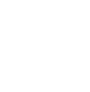
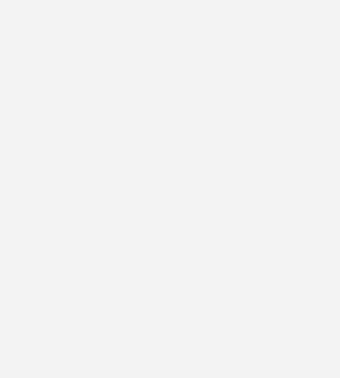
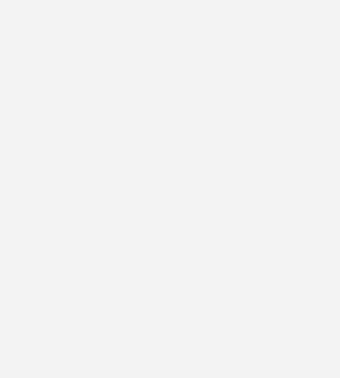
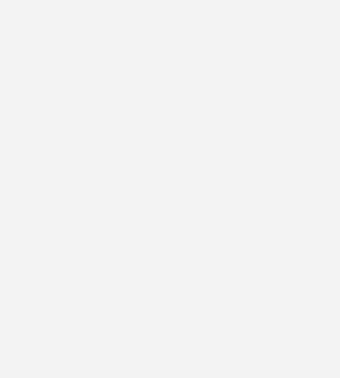
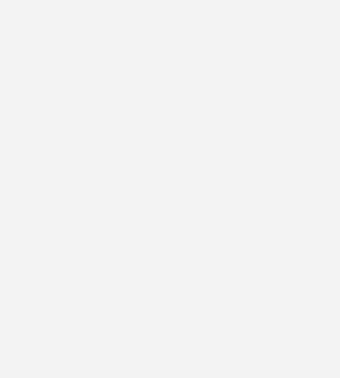
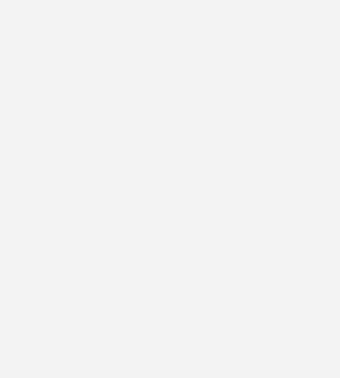
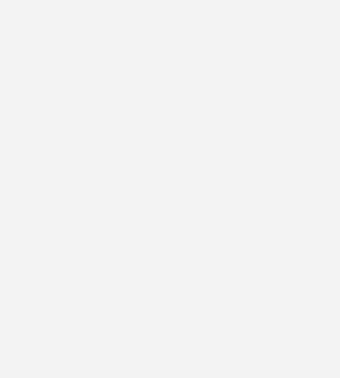
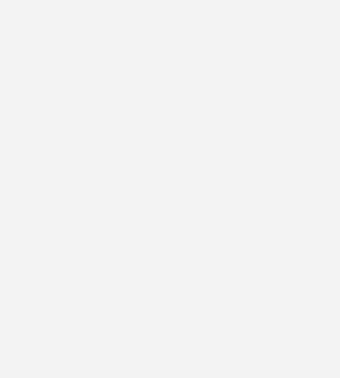
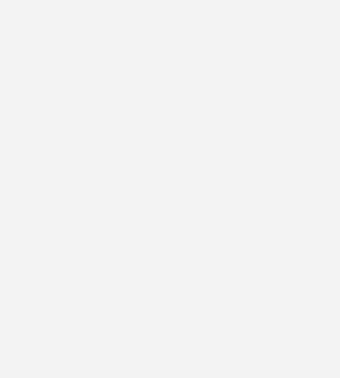
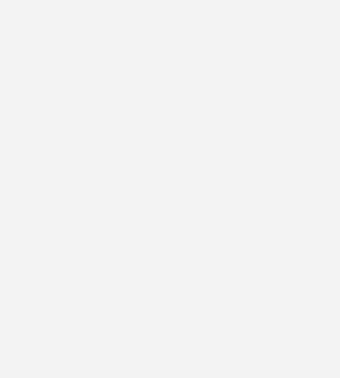
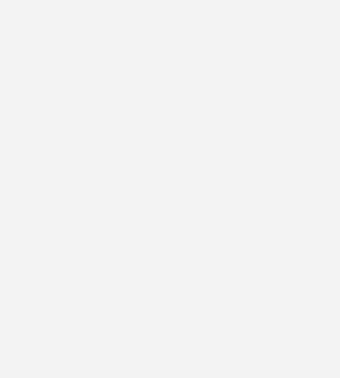
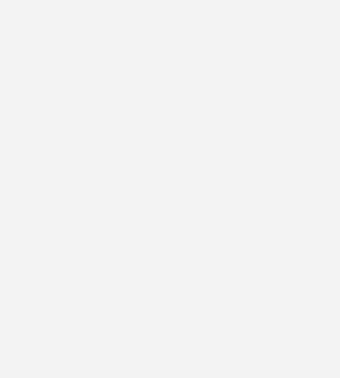
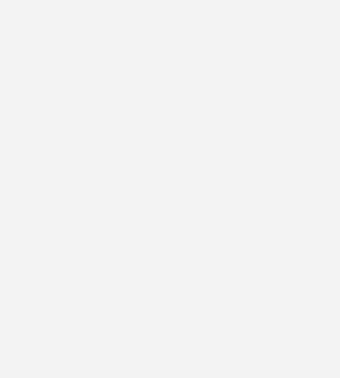

In [89]:
sal_response = requests.get('https://www.ferragamo.com/shop/us/en/women/handbags')
sal_text = BeautifulSoup(sal_response.text, 'html.parser')
print(sal_text.prettify())

<p><a name="rebecca"></a></p>

# Rebecca Minkoff
## ** Using Selenium **

In [90]:
rm_response = requests.get('https://www.rebeccaminkoff.com/collections/handbags')
rm_text = BeautifulSoup(rm_response.text, 'html.parser')
print(rm_text.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <!-- Get Top Level Collection Info =========================== -->
  <!-- trend shops -->
  <!-- clothing -->
  <!-- handbags -->
  <!-- shoes -->
  <!-- accessories -->
  <!-- watches -->
  <!-- sale -->
  <!-- Redirect Hidden Products =========================== -->
  <!-- MotionPoint =========================== -->
  <script src="//cdn.shopify.com/s/files/1/1754/9245/t/2/assets/mp_linkcode.js?104548" type="text/javascript">
  </script>
  <!--– mp_snippet_begins -->
  <script type="text/javascript">
   MP.UrlLang='mp_js_current_lang';
  MP.SrcUrl=decodeURIComponent('mp_js_orgin_url');
  MP.oSite=decodeURIComponent('mp_js_origin_baseUrl');
  MP.tSite=decodeURIComponent('mp_js_translated_baseUrl');
  MP.init();
  var mp_langLink = function() {
      var langlinks = document.querySelectorAll('.langLink');
      for (var i = 0; i < langlinks.length; i++) {
          langlinks.item(i).onclick = function() {
              MP.init();
              

<p><a name="alex"></a></p>

# Alexander McQueen

In [3]:
am_response = requests.get('https://www.alexandermcqueen.com/us/alexandermcqueen/online/women/bags#%7B%22ytosQuery%22%3A%22true%22%2C%22department%22%3A%22w_bags_micro%22%2C%22gender%22%3A%22D%22%2C%22season%22%3A%22A%2CP%2CE%22%2C%22site%22%3A%22alexandermcqueen%22%2C%22yurirulename%22%3A%22searchwithdepartmentseasonmain%22%2C%22page%22%3A%223%22%2C%22productsPerPage%22%3A%2250%22%2C%22suggestion%22%3A%22false%22%2C%22facetsvalue%22%3A%5B%5D%2C%22totalPages%22%3A3%2C%22rsiUsed%22%3A%22false%22%2C%22totalItems%22%3A%22101%22%2C%22partialLoadedItems%22%3A%2250%22%2C%22itemsToLoadOnNextPage%22%3A%2250%22%7D')
am_text = BeautifulSoup(am_response.text, 'html.parser')
print(am_text.prettify())

<!DOCTYPE html>
<html class="no-js desktop us" lang="en" prefix="fb: http://www.facebook.com/2008/fbml og: http://opengraphprotocol.org/schema/" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <script src="/ytos/resources/BASE/js/shims/npo.js">
  </script>
  <meta charset="utf-8"/>
  <meta content="width=device-width, minimal-ui" name="viewport"/>
  <meta content="63DC292C8A8595C948B2E66D6A39C5E7" name="msvalidate.01">
   <link href="/favicon.ico" rel="shortcut icon"/>
   <meta content="8ZWG5OZJSVX_VcZd6v-JrAd3J1iSK20yDR5rIYoM3i4" name="google-site-verification"/>
   <meta content="OPtqg7Zq9qMbra7gPSFh_KPRJUaAmlDB0c4Vom7Q3vQ" name="google-site-verification"/>
   <script>
    if (typeof yTos === 'undefined') {
        yTos = {};
    }

    yTos.navigation = {"SiteCode":"ALEXANDERMCQUEEN_US","Culture":"","Gender":"D","Action":"Index","Controller":"Search","Area":"","CurrencySign":"","GenerationDate":"20190821164901","GenerationOriginMachine":"YFP1ALEXA02INET","PathAndQuery":"/Search/Inde

In [74]:
am_name = am_text.find_all('span', {'class':"modelName"})

In [75]:
am_name = get_string(am_name)

In [13]:
am_price = am_text.find_all('span', {'class':"value"})
am_price = get_string(am_price)

In [25]:
am_color = am_price[0::2]

In [29]:
yes = am_price[1::2]
del yes[-1]

In [67]:
yes = [int(i.replace(',','')) for i in yes]

In [76]:
am_color

['Black',
 'Black',
 'Black',
 'Multicolor',
 'ROSA',
 'Black',
 'OLTREMARE',
 'Black',
 'Black',
 'Bone',
 'Black',
 'Ivory/Bone',
 'Black',
 'Lust Red',
 'OLTREMARE',
 'Cloud Blue',
 'Deep Ivory',
 'Black',
 'Black',
 'Black',
 'Black',
 'Off White',
 'Dark Rose',
 'Lust Red',
 'Tan',
 'Ivory',
 'Dark Red',
 'VELVET RED',
 'Black',
 'Black',
 'Black',
 'Black/Silver',
 'Black',
 'Emerald',
 'Ivory',
 'Dark Red',
 'Ivory',
 'Black',
 'Black',
 'Black',
 'Black',
 'Black',
 'Multicolor',
 'Multicolor',
 'Black',
 'Optic White',
 'Black',
 'VELVET RED',
 'Bone',
 'Black/Camel',
 None,
 None]

In [78]:
mcqueen = data_frame(am_name,yes,am_color)

In [81]:
mcqueen = mcqueen.dropna()

<BarContainer object of 50 artists>

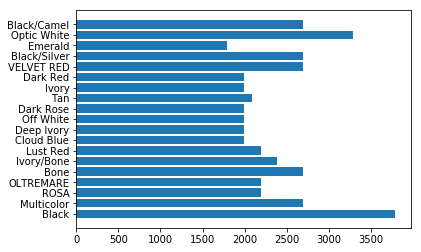

In [83]:
plt.barh(mcqueen.color, mcqueen.price)

In [191]:
mcqueen['brand'] = ['Alexander McQueen'] *50

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [192]:
mcqueen

name   price         color              brand
0   Mechanical Jewelled Satchel  3790.0         Black  Alexander McQueen
1   Mechanical Jewelled Satchel  2490.0         Black  Alexander McQueen
2              Jewelled Satchel  2190.0         Black  Alexander McQueen
3              Jewelled Satchel  2690.0    Multicolor  Alexander McQueen
4              Jewelled Satchel  2190.0          ROSA  Alexander McQueen
5              Jewelled Satchel  2190.0         Black  Alexander McQueen
6              Jewelled Satchel  2190.0     OLTREMARE  Alexander McQueen
7             Jewelled Satchel
  2190.0         Black  Alexander McQueen
8       Spider Jewelled Satchel  2390.0         Black  Alexander McQueen
9       Spider Jewelled Satchel  2390.0          Bone  Alexander McQueen
10             Jewelled Satchel  2390.0         Black  Alexander McQueen
11             Jewelled Satchel  2390.0    Ivory/Bone  Alexander McQueen
12             Jewelled Satchel  2390.0         Black  Alexander McQueen
13             Jewelled Satchel  2190.0      Lust Red  Alexander McQueen
14       Small Jewelled Satchel  1990.0     OLTREMARE  Alexander McQueen
15       Small Jewelled Satchel  1990.0    Cloud Blue  Alexander McQueen
16       Small Jewelled Satchel  1990.0    Deep Ivory  Alexander McQueen
17       Small Jewelled Satchel  2290.0         Black  Alexander McQueen
18       Small Jewelled Satchel  1990.0         Black  Alexander McQueen
19       Small Jewelled Satchel  1990.0         Black  Alexander McQueen
20       Small Jewelled Satchel  1990.0         Black  Alexander McQueen
21       Small Jewelled Satchel  1990.0     Off White  Alexander McQueen
22       Small Jewelled Satchel  1990.0     Dark Rose  Alexander McQueen
23       Small Jewelled Satchel  1990.0      Lust Red  Alexander McQueen
24                   Box Bag 19  2090.0           Tan  Alexander McQueen
25                   Box Bag 19  1990.0         Ivory  Alexander McQueen
26                   Box Bag 19  1990.0      Dark Red  Alexander McQueen
27                   Box Bag 19  1990.0    VELVET RED  Alexander McQueen
28                   Box Bag 19  1990.0         Black  Alexander McQueen
29                   Box Bag 19  1990.0         Black  Alexander McQueen
30                   Box Bag 19  2690.0         Black  Alexander McQueen
31                   Box Bag 16  2690.0  Black/Silver  Alexander McQueen
32                   Box Bag 16  1790.0         Black  Alexander McQueen
33                   Box Bag 16  1790.0       Emerald  Alexander McQueen
34                   Box Bag 16  1790.0         Ivory  Alexander McQueen
35                   Box Bag 16  1790.0      Dark Red  Alexander McQueen
36                   Box Bag 16  1790.0         Ivory  Alexander McQueen
37                   Box Bag 16  1790.0         Black  Alexander McQueen
38                   Box Bag 16  1890.0         Black  Alexander McQueen
39                   Box Bag 16  1890.0         Black  Alexander McQueen
40                   Box Bag 16  3190.0         Black  Alexander McQueen
41                   Box Bag 16  2090.0         Black  Alexander McQueen
42                   Box Bag 16  1890.0    Multicolor  Alexander McQueen
43                   Box Bag 16  1890.0    Multicolor  Alexander McQueen
44               The Pinter Bag  3190.0         Black  Alexander McQueen
45               The Pinter Bag  3290.0   Optic White  Alexander McQueen
46               The Pinter Bag  2690.0         Black  Alexander McQueen
47               The Pinter Bag  2690.0    VELVET RED  Alexander McQueen
48               The Pinter Bag  2690.0          Bone  Alexander McQueen
49               The Pinter Bag  2690.0   Black/Camel  Alexander McQueen

<p><a name="function"></a></p>

# Functions Used

In [5]:
def get_string(lis):
    return [get.string for get in lis]

In [71]:
def to_int(lis):
    return [int(i.replace(',','')) for i in lis]

In [72]:
def data_frame(lis1, lis2, lis3):
    '''This function is to convert all the lists into DataFrames and then Concatenate them to
    form one big DataFrame.'''
    lis1 = pd.DataFrame(lis1, columns = ['name'])
    lis2 = pd.DataFrame(lis2, columns = ['price'])
    lis3 = pd.DataFrame(lis3, columns = ['color'])
    
    np = pd.concat([lis1,lis2],axis=1)
    combined = pd.concat([np,lis3],axis=1)
    
    return combined